# Part I. One-sided finite differences

In [1]:
import numpy as np 
import math 
import matplotlib.pyplot as plt 

%matplotlib inline 

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [2]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    # ... ENTER YOUR CODE HERE ...
    f_der_1 = (f(x + 0.5 * h) - f(x)) / (0.5 * h)
    f_der_2 = (f(x + h) - f(x)) / h
    
    return 2 * f_der_1 - f_der_2

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 --  -5e-05
0.001000 --  -5e-07
0.000100 --  -5e-09
0.000010 --  -5e-11


 ... ENTER YOUR COMMENTS HERE ...

Clearly, results are much close to 0 when h approaching to 0.

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [4]:
def two_point_deriv(f, x, h): 
    f_plus = f(x + h)
    f0 = f(x)
    
    return (f_plus - f0) / h

In [5]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

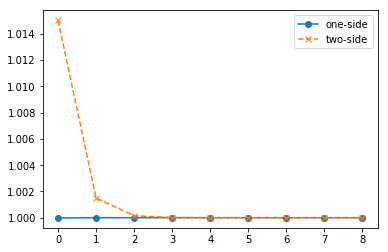

In [6]:
# ... ENTER YOUR CODE HERE ...
x = 1
err_one_pt, err_two_pt = [], [] 
for h in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]:
    err_two_pt.append(two_point_deriv(f, x, h))
    err_one_pt.append(deriv(f, x, h))
    

nb = len(err_one_pt)
plt.plot(np.arange(nb), np.array(err_one_pt), 'o-', label='one-side')
plt.plot(np.arange(nb), np.array(err_two_pt), 'x--', label='two-side')
plt.legend()

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [7]:
def three_poin_deriv(f, x, h): 
    f0 = f(x)
    f1 = f(x + h)
    f2 = f(x + 2 * h)
    
    return (-3.0 / 2.0 * f0 + 2.0 * f1 - 0.5 * f2) / h

In [8]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.006931
0.001000 -- -0.0006931
0.000100 -- -6.931e-05
0.000010 -- -6.931e-06


... ENTER YOUR EXPLANATION HERE ...

According to the result, we can realize that errors will converge when h approaching to 0. 
This is because that the derivative of f is (2 * log(x) + 1) * x, the derivative term will dominated by x. 

# Part II. Midpoint rule 

In [9]:
from scipy.integrate import quad 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [10]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    # ... ENTER YOUR CODE HERE ...
    N, pre_result, err = 10, 10, 10
    
    while err > eps: 
        h = (b - a) / N 
        result = 0
        
        for i in range(N - 1): 
            result += func(a + i * h + h / 2) * h
            
        err = abs(pre_result - result)
        pre_result = result
        
        N *= 2 
        
    return result 

In [11]:
# Analytical Soultion 
f = lambda x: x**3
a, b = 0, 1

In [12]:
# Analytical Solution 
result = quad(f, a, b)[0]
print(result)

0.25


In [13]:
EPS = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

for eps in EPS: 
    result_app = midpoint_rule(f, a, b, eps)
    print(result_app, '\t', result_app - result)


0.24380352802276622 	 -0.006196471977233775
0.24921958887581702 	 -0.0007804111241829781
0.24990235686232348 	 -9.764313767651744e-05
0.24999389653559848 	 -6.103464401524539e-06
0.24999923706134533 	 -7.62938654669254e-07


### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


... ENTER YOUR CODE AND COMMENTS HERE ...

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [14]:
# ... ENTER YOUR CODE HERE ...
f = lambda x: math.sin(math.sqrt(x)) / x 
f_modify = lambda x: f(x) - 1 / math.sqrt(x)

In [15]:
# Analytical Solution 
result = quad(f, a, b)[0]
print(result)

1.8921661407343815


In [16]:
eps = 1e-4 
result_app = midpoint_rule(f, a, b, eps)

print(result_app, '\t', result_app - result)

1.8919792579979704 	 -0.0001868827364110981


In [18]:
result_mdy = midpoint_rule(f_modify, a, b, eps) + 2

print(result_mdy, '\t', result_mdy - result)

1.8922279827958923 	 6.18420615108306e-05
